In [15]:
import sys
from glob import glob
from datetime import datetime, timedelta

import h5py
import pygrib
import numpy as np
import netCDF4 as nc

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du
import preprocess_utils as pu

In [4]:
import importlib
importlib.reload(du)

<module 'data_utils' from '/glade/u/home/ksha/NCAR/libs/data_utils.py'>

In [19]:
year = 2019
nc_files = sorted(glob(NCAR500_dir+'{}*/*_12_00_00.nc'.format(year)))

In [21]:
### HRRR test
with pygrib.open(HRRR_dir+'HRRR.20181231.natf12.grib2') as grbio:
    var = grbio.select(name='10 metre U wind component')[0]
    U10_HRRR = var.values
    var = grbio.select(name='10 metre V wind component')[0]
    V10_HRRR = var.values

In [22]:
HRRR_shape = U10_HRRR.shape
L = len(nc_files)
U10_HRRR_full = np.empty((L,)+HRRR_shape)
V10_HRRR_full = np.empty((L,)+HRRR_shape)

for i in range(L):
    dt_str = nc_files[i][51:59]
    with pygrib.open(HRRR_dir+'HRRR.{}.natf12.grib2'.format(dt_str)) as grbio:
        var = grbio.select(name='10 metre U wind component')[0]
        U10_HRRR_full[i, ...] = var.values
        var = grbio.select(name='10 metre V wind component')[0]
        V10_HRRR_full[i, ...] = var.values

In [23]:
with h5py.File(save_dir+"NCAR500_y{}.hdf".format(year), 'r') as h5io:
        U10_NCAR500 = h5io['U10'][...]
        V10_NCAR500 = h5io['V10'][...]

In [33]:
U10_HRRR_full = U10_HRRR_full[:, 32:1017, 109:1689]

In [34]:
V10_HRRR_full = V10_HRRR_full[:, 32:1017, 109:1689]

In [38]:
np.quantile(U10_HRRR_full.ravel(), 0.999)

12.361249923706055

In [55]:
u_bins = np.linspace(-40, 40, 160)
v_bins = np.linspace(-40, 40, 160)

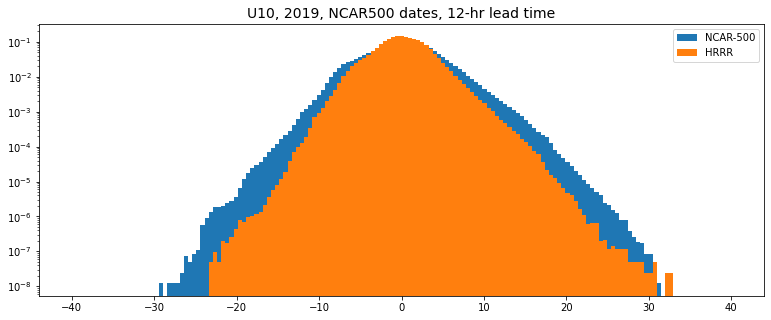

In [57]:
plt.figure(figsize=(13, 5))
ax = plt.gca()
ax.hist(U10_NCAR500.ravel(), bins=u_bins, density=True, log=True, label='NCAR-500');
ax.hist(U10_HRRR_full.ravel(), bins=u_bins, density=True, log=True, label='HRRR');
ax.set_title("U10, 2019, NCAR500 dates, 12-hr lead time", fontsize=14)
ax.legend()

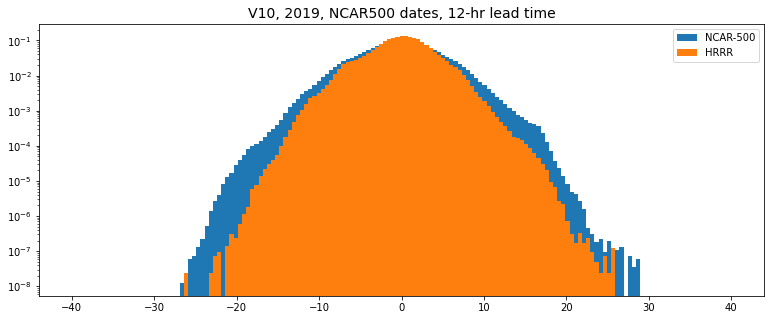

In [59]:
plt.figure(figsize=(13, 5))
ax = plt.gca()
ax.hist(V10_NCAR500.ravel(), bins=v_bins, density=True, log=True, label='NCAR-500');
ax.hist(V10_HRRR_full.ravel(), bins=v_bins, density=True, log=True, label='HRRR');
ax.set_title("V10, 2019, NCAR500 dates, 12-hr lead time", fontsize=14)
ax.legend()